In [ ]:
!pip install fal-client

In [ ]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

In [2]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

url = fal_client.upload_file("mt-face.zip")

# https://fal.ai/models/fal-ai/flux-pro-trainer/playground

def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

result = fal_client.subscribe(
    "fal-ai/flux-pro-trainer",
    arguments={
        "data_url": url,
        "finetune_comment": "test-face",
        "mode": "character", # product, style, general
        "trigger_word": "UKJ"
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

{'finetune_id': '9e20996f-ca50-42be-8e5e-708da2d941e9'}


In [ ]:
import fal_client

handler = fal_client.submit(
    "fal-ai/flux-pro-trainer",
    arguments={
        "data_url": url,
        "finetune_comment": "test-face",
        "mode": "character", # product, style, general
        "trigger_word": "UKJ"
    },
    # webhook_url="https://optional.webhook.url/for/results",
)

request_id = handler.request_id

In [10]:
request_id = "b6ea732e-c4ad-42a8-befb-e42f6ba322ac"

In [5]:
status = fal_client.status("fal-ai/flux-pro-trainer", request_id, with_logs=True)
status

Completed(logs=[], metrics={'inference_time': 759.3991930484772})

In [12]:
result = fal_client.result("fal-ai/flux-pro-trainer", request_id)
result

{'finetune_id': '9e20996f-ca50-42be-8e5e-708da2d941e9'}

In [14]:
fine_tune_id = result['finetune_id']

{'images': [{'url': 'https://fal.media/files/rabbit/Z9J-_-RhMQXNM7DfSJ81C_f538088c74574b05b323ac1d311ae546.jpg', 'width': 1024, 'height': 768, 'content_type': 'image/jpeg'}], 'timings': {}, 'seed': 4055989012, 'has_nsfw_concepts': [False], 'prompt': 'LinkedIn profile picture of UKJ'}

After training:


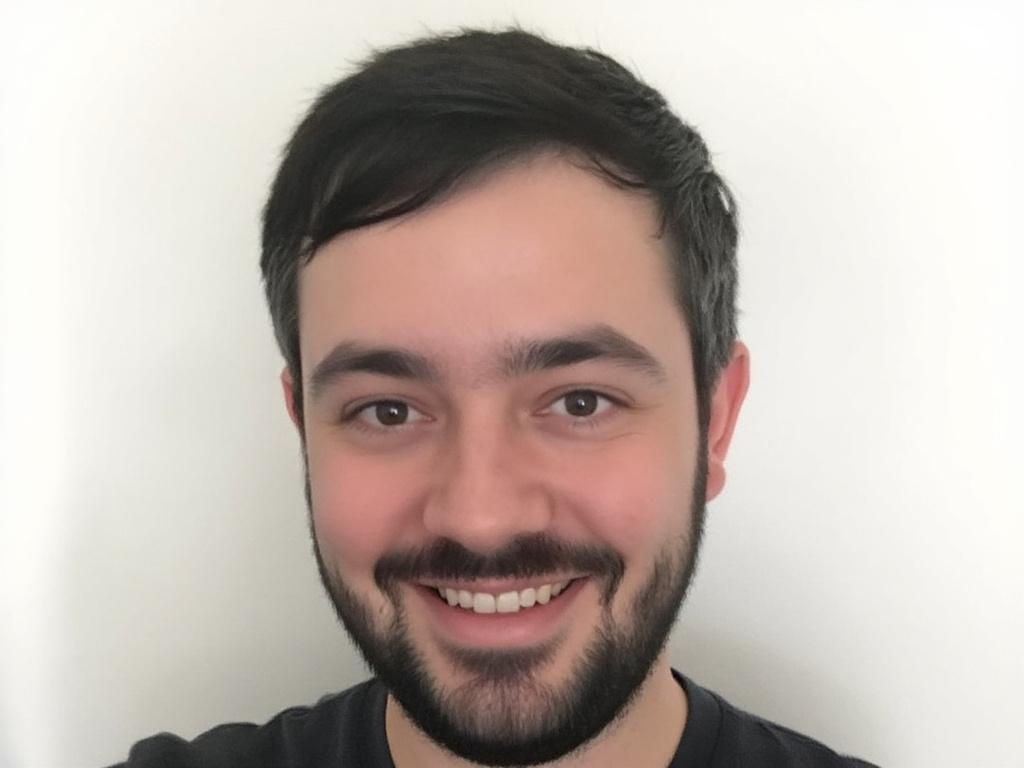

In [17]:
result = fal_client.subscribe(
    "fal-ai/flux-pro/finetuned",
    arguments={
        "prompt": "LinkedIn profile picture of UKJ",
        "finetune_id": fine_tune_id,
        "finetune_strength": 1
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

print("\nAfter training:")

# Get and display transformed image
image_url = result['images'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)